# Goal of this project
The goal of this project is to classify a collection of documents into predefined categories based on their content. The project involves training and evaluating a text classification model using machine learning techniques, specifically focusing on applying a simple classification model to categorize documents into one of eight classes. The ultimate goal is to automatically classify and organize large volumes of text data efficiently.

## Steps Involved:
### Data Preparation:

Clean the data by removing noise like special characters.
Convert text into a numerical format using techniques like TF-IDF or Count Vectorizer.

### Model Selection: We tested multiple models:

Logistic Regression
Naive Bayes
Support Vector Machine (SVM)

### Model Training:

Split the dataset into training and test sets (usually 70-30 or 80-20).
Train the model on the training set and evaluate it on the test set.

### Evaluation:

Accuracy: Measures the percentage of correct predictions.
Confusion Matrix: Shows true vs. predicted labels.
Precision, Recall, and F1 Score: Measure how well the model performs, especially for imbalanced data.

### Results:

The model with the highest accuracy and F1 score was selected.
The confusion matrix showed where the model made mistakes.

### Data Preparation:

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [3]:
df=pd.read_csv('documents/file.txt')
df.head(5)

,5485
0,1 champion products ch approves stock split ch...
1,2 computer terminal systems cpml completes sal...
2,1 cobanco inc cbco year net shr cts vs dlrs ne...
3,1 am international inc am nd qtr jan oper shr ...
4,1 brown forman inc bfd th qtr net shr one dlr ...


In [4]:
labels=[]
for i in df['5485']:
    labels.append(int(i[0]))

labels[:5]

[1, 2, 1, 1, 1]

In [5]:
df['labels']=labels

In [6]:
df.head(5)

,5485,labels
0,1 champion products ch approves stock split ch...,1
1,2 computer terminal systems cpml completes sal...,2
2,1 cobanco inc cbco year net shr cts vs dlrs ne...,1
3,1 am international inc am nd qtr jan oper shr ...,1
4,1 brown forman inc bfd th qtr net shr one dlr ...,1


In [7]:
df.isnull().sum()
df=df.rename({'5485':'doc_text'},axis=1)
df.columns

Index(['doc_text', 'labels'], dtype='object')

In [8]:
df['labels'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [9]:
df['doc_text']=df['doc_text'].str[1:]
df['doc_text'].head(5)

0     champion products ch approves stock split cha...
1     computer terminal systems cpml completes sale...
2     cobanco inc cbco year net shr cts vs dlrs net...
3     am international inc am nd qtr jan oper shr l...
4     brown forman inc bfd th qtr net shr one dlr v...
Name: doc_text, dtype: object

In [10]:
df.head(3)

,doc_text,labels
0,champion products ch approves stock split cha...,1
1,computer terminal systems cpml completes sale...,2
2,cobanco inc cbco year net shr cts vs dlrs net...,1


### Split the dataset into training and test sets

In [11]:
# Split the data into train and test sets (80% train, 20% test)
X = df['doc_text']
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Converting text data to TF-IDF features is necessary because:

Text to Numbers: 
Machine learning models require numerical data, and TF-IDF turns text into numbers.

Captures Word Importance:
It highlights important words in a document by considering both how often a word appears and how rare it is across all documents.

Improves Accuracy: 
TF-IDF helps the model focus on meaningful words, improving classification performance.
Reduces Noise: It ignores common, unimportant words (like "the" and "is") to focus on words that help differentiate documents.

In short, TF-IDF makes text usable for machine learning models and helps improve their performance.








In [12]:
# Convert text data to TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)  # You can change max_features
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


### Model Selection and training

In [13]:

# Train a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.95897903372835
Classification Report:
               precision    recall  f1-score   support

           1       0.98      0.98      0.98       556
           2       0.93      0.99      0.96       323
           3       0.96      0.96      0.96        54
           4       1.00      0.85      0.92        20
           5       1.00      0.78      0.88         9
           6       0.96      0.87      0.91        53
           7       0.94      0.84      0.89        38
           8       0.90      0.82      0.86        44

    accuracy                           0.96      1097
   macro avg       0.96      0.89      0.92      1097
weighted avg       0.96      0.96      0.96      1097



In [14]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy (Naive Bayes):", accuracy_score(y_test, y_pred_nb))
print("Classification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))


Accuracy (Naive Bayes): 0.9279854147675478
Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           1       0.99      0.92      0.96       556
           2       0.87      0.99      0.92       323
           3       0.79      0.98      0.88        54
           4       1.00      0.75      0.86        20
           5       1.00      0.11      0.20         9
           6       0.92      0.91      0.91        53
           7       0.94      0.79      0.86        38
           8       0.84      0.84      0.84        44

    accuracy                           0.93      1097
   macro avg       0.92      0.79      0.80      1097
weighted avg       0.94      0.93      0.93      1097



In [15]:
from sklearn.svm import SVC

# Train a Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')  # You can also experiment with other kernels
svm_model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluate the model
print("Accuracy (SVM):", accuracy_score(y_test, y_pred_svm))
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))


Accuracy (SVM): 0.9608021877848678
Classification Report (SVM):
               precision    recall  f1-score   support

           1       0.99      0.98      0.98       556
           2       0.94      0.98      0.96       323
           3       0.95      0.96      0.95        54
           4       0.95      0.90      0.92        20
           5       1.00      0.78      0.88         9
           6       0.92      0.92      0.92        53
           7       0.89      0.82      0.85        38
           8       0.90      0.84      0.87        44

    accuracy                           0.96      1097
   macro avg       0.94      0.90      0.92      1097
weighted avg       0.96      0.96      0.96      1097



In [20]:
import joblib
# Save the trained SVM model
joblib.dump(svm_model, 'saved_models/svm_model.pkl')

['saved_models/svm_model.pkl']

### Evaluation:

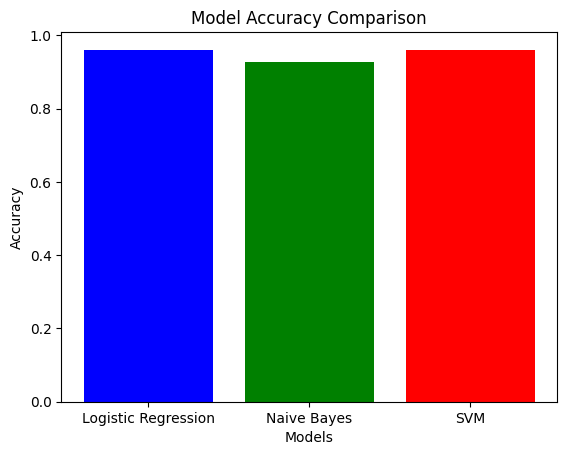

In [16]:
import matplotlib.pyplot as plt

# Example accuracies (you can replace these with actual results)
models = ['Logistic Regression', 'Naive Bayes', 'SVM']
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm)]

# Plotting accuracy graph
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()


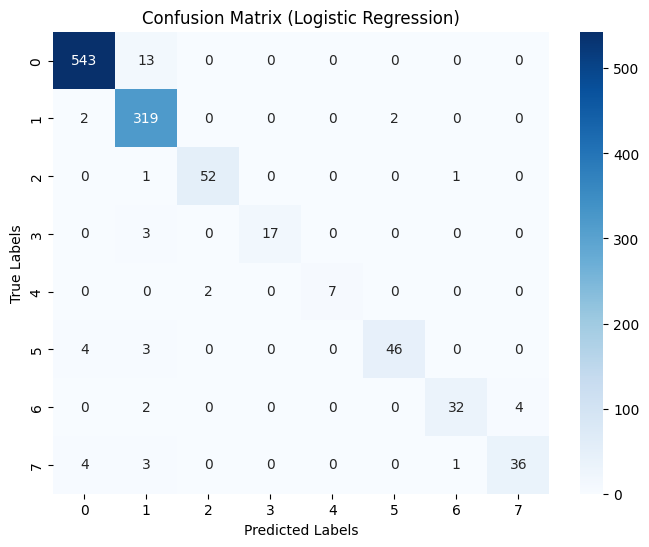

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(8), yticklabels=range(8))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()
